<div>
<img src="./img/2021_LA-CoNGA_UCV.jpg" width="400"/>
</div>

# Machine Learning (Introduccion)
## Sesion 1

Gabriel Abellan <gabriel.abellan@gmail.com>

En este `notebook` preentaremos algunos terminos y tecnicas comunes de `machine learning`. Cuando se habla de `Deep Learning`, indicamos un conjunto de herramientas y tecnicas de `machine learning` que implican Redes Neuronales Artificiales.

`Machine Learning` es una rama de la inteligencia artificial que desarrolla algoritmos capaces de aprender patrones y reglas utilizando datos. Aunque conceptualmente es una disciplina fundamentada ~1950, su reciente uso exahustivo tiene que ver con tres factores:
- Desarrollo en la capacidad de almacenamiento a bajo costo.
- Desarrollo en la capacidad de computo a bajo costo.
- Desarrollo de dispositivos que producen cantidades enormes de datos (telefonos moviles, webs, sensores, etc).

El proposito de este taller es introducir conceptos que (tal vez) son nuevos pero aplicarlos a problemas que (tal vez) ya conocen. De esta manera queremos minimizar el impacto del primer encuentro con el tema y acelerar asi la curva de aprendizaje. Una vez familiarizados con la herramienta, se trata de buscar (o crear) nuevos algoritmos e implementarlos dentro del framework.

Los conceptos nuevos tienen que ver con `redes neuronales` y su aplicacion; los problemas que trataremos son los viejos y conocidos problemas de `regresion` y `clasificacion` (ejemplos de aprendizaje supervisado), asi como reduccion dimensional haciendo `analisis de componentes principales PCA` (ejemplo de aprendizaje no-supervisado).

Usamos el archivo `common.py` para importar las librerias mas usadas en esta parte

In [1]:
with open('common.py') as fin:
    msg = fin.read()

In [2]:
print(msg)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sb
import warnings
import logging

logging.getLogger("tensorflow").disabled = True
warnings.simplefilter("ignore")


In [3]:
exec(msg)

## Apredizaje Supervisado
### Modelo Lineal - Regresion

Tenemos una data sobre personas que incluye: genero, altura y peso. Deseamos hacer un modelo simple que permita predecir el peso en funcion de la altura.

In [4]:
data_path = './datasets/weight-height.csv'

In [5]:
df = pd.read_csv(data_path)
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [6]:
df.info()   # tambien es posible obtener informacion usando df.describe()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


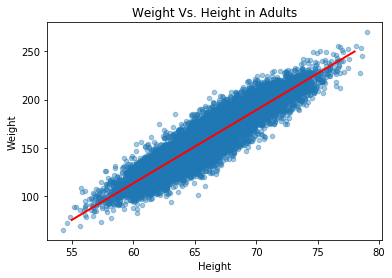

In [7]:
df.plot(kind='scatter', x='Height',
        y='Weight', title='Weight Vs. Height in Adults',
        alpha=.4)
plt.plot([55,78], [75,250], color='red', linewidth=2)

definimos una funcion para construir la ecuacion de una recta 1D

In [8]:
def line(x, w=0, b=0):
    return x*w + b

In [9]:
x = np.linspace(55,80, 101)
x.shape

(101,)

Construimos la ecuacion de una recta trivial

In [10]:
yhat = line(x, w=0, b=0)

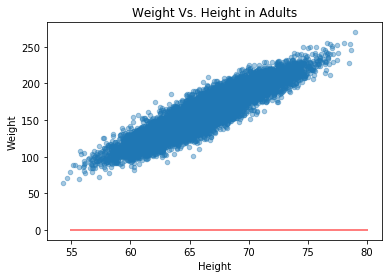

In [11]:
df.plot(kind='scatter', x='Height',
        y='Weight', title='Weight Vs. Height in Adults',
        alpha=.4)
plt.plot(x, yhat, color='red', linewidth=2, alpha=.5)

Probamos variando $b$

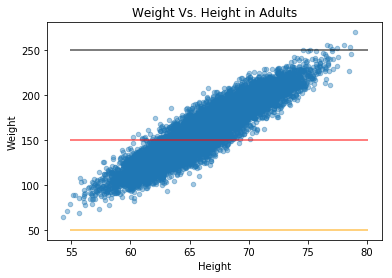

In [12]:
df.plot(kind='scatter', x='Height',
        y='Weight', title='Weight Vs. Height in Adults',
        alpha=.4)
plt.plot(x, line(x, b=50), color='orange', linewidth=2, alpha=.5)
plt.plot(x, line(x, b=150), color='red', linewidth=2, alpha=.5)
plt.plot(x, line(x, b=250), color='black', linewidth=2, alpha=.5)

Probamos variando $w$

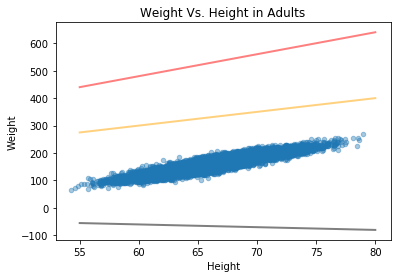

In [13]:
df.plot(kind='scatter', x='Height',
        y='Weight', title='Weight Vs. Height in Adults',
        alpha=.4)
plt.plot(x, line(x, w=5), color='orange', linewidth=2, alpha=.5)
plt.plot(x, line(x, w=8), color='red', linewidth=2, alpha=.5)
plt.plot(x, line(x, w=-1), color='black', linewidth=2, alpha=.5)

Es posible describir la data encontrando un buen juego de parametros $(w,b)$

Definimos una funcion para calcular el error cuadratico medio

In [14]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

Queremos hacer un modelo donde se predice el peso de un sujeto usando como predictor la altura

In [15]:
X = df[['Height']].values
X.shape

(10000, 1)

In [16]:
y_true = df['Weight'].values
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

Usando el modelo (con los parametros por defecto), calculamos las predicciones para X

In [17]:
y_pred = line(X)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Calculamos el error entre los datos reales y la prediccion

In [18]:
mse_01 = mean_squared_error(y_true, y_pred)
print('mse: {:.3f}'.format(mse_01))

mse: 27093.838


Ahora comenzamos a variar los parametros de la recta y observamos como el MSE va cambiando

In [19]:
y_pred = line(X, w=2)
print('mse: {:.3f}'.format(mean_squared_error(y_true, y_pred.ravel())))

mse: 1457.122


In [20]:
y_pred = line(X, w=2, b=20)
print('mse: {:.3f}'.format(mean_squared_error(y_true, y_pred.ravel())))

mse: 708.913


Podemos repetir esto para varios valores de $b$ y graficar

Text(0.5, 0, 'b')

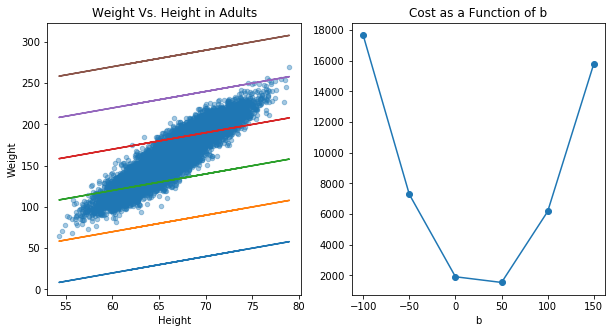

In [21]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(121)
df.plot(kind='scatter',
       x='Height', y='Weight', ax=ax1,
       alpha=.4, title='Weight Vs. Height in Adults')

bbs = np.array([-100,-50,0,50,100,150])

mses = []
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)
    
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a Function of b')
plt.xlabel('b')

Este proceso que hemos realizado aca *con la mano* es lo que hace una libreria como `keras` aprovechando los recursos de `Tensorflow`.

En esta presentacion hemos decidido usar `keras` de manera que pueda ganarse familiaridad con las herramientas que se utilizan en Deep Learning.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [23]:
model = Sequential()

In [24]:
model.add(Dense(1, input_shape=(1,)))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(Adam(lr=0.8),loss='mse')
#model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
model.fit(X, y_true, epochs=30, verbose=1)

Train on 10000 samples
Epoch 1/30
10000/10000 [==============================] - 2s 152us/sample - loss: 1366.7797
Epoch 2/30
10000/10000 [==============================] - 0s 30us/sample - loss: 554.1085
Epoch 3/30
10000/10000 [==============================] - 0s 31us/sample - loss: 541.3402
Epoch 4/30
10000/10000 [==============================] - 0s 31us/sample - loss: 498.9928
Epoch 5/30
10000/10000 [==============================] - 0s 32us/sample - loss: 449.1424
Epoch 6/30
10000/10000 [==============================] - 0s 31us/sample - loss: 424.6874
Epoch 7/30
10000/10000 [==============================] - 0s 33us/sample - loss: 389.1188
Epoch 8/30
10000/10000 [==============================] - 0s 31us/sample - loss: 335.2208
Epoch 9/30
10000/10000 [==============================] - 0s 28us/sample - loss: 310.2175
Epoch 10/30
10000/10000 [==============================] - 0s 31us/sample - loss: 281.8915
Epoch 11/30
10000/10000 [==============================] - 0s 29us/sample 

In [28]:
y_pred = model.predict(X)
y_pred

array([[211.96902],
       [174.06131],
       [213.93802],
       ...,
       [137.28525],
       [175.9498 ],
       [122.88776]], dtype=float32)

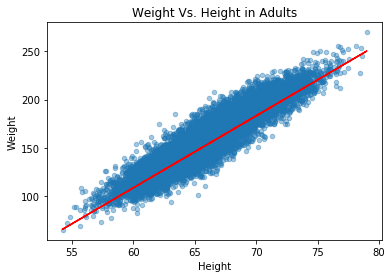

In [29]:
df.plot(kind='scatter',
       x='Height', y='Weight',
       title='Weight Vs. Height in Adults', alpha=.4)
plt.plot(X, y_pred, color='red')

In [30]:
W, B = model.get_weights()
w = W[0,0]; b = B[0];
print(model.get_weights())
print('w = {:.2f}\nb = {:.2f}'.format(w,b))

[array([[7.484075]], dtype=float32), array([-340.7076], dtype=float32)]
w = 7.48
b = -340.71


Para evaluar modelos de regresion se utiliza la metrica $R^2$.

In [31]:
from sklearn.metrics import r2_score

In [32]:
r = r2_score(y_true, y_pred)
print('The R^2 score is {:.3f}'.format(r))

The R^2 score is 0.826


Podemos usar la libreria `sklearn` para implementar el procedimiento de `Cross Validation`

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true, train_size=.8)

In [35]:
print(X_train.shape)
print(X.shape)

(8000, 1)
(10000, 1)


In [36]:
history = model.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 1s 69us/sample - loss: 176.7109 - val_loss: 146.3173
Epoch 2/50
8000/8000 [==============================] - 0s 38us/sample - loss: 180.6851 - val_loss: 182.3241
Epoch 3/50
8000/8000 [==============================] - 0s 38us/sample - loss: 178.5215 - val_loss: 152.0797
Epoch 4/50
8000/8000 [==============================] - 0s 36us/sample - loss: 179.5346 - val_loss: 146.4929
Epoch 5/50
8000/8000 [==============================] - 0s 38us/sample - loss: 176.8947 - val_loss: 236.1593
Epoch 6/50
8000/8000 [==============================] - 0s 37us/sample - loss: 195.7201 - val_loss: 157.9407
Epoch 7/50
8000/8000 [==============================] - 0s 38us/sample - loss: 180.8093 - val_loss: 149.4771
Epoch 8/50
8000/8000 [==============================] - 0s 37us/sample - loss: 173.4846 - val_loss: 208.2234
Epoch 9/50
8000/8000 [==============================] - 0s 37us/sample - loss: 1

In [37]:
y_train_pred = model.predict(X_train).ravel()
y_train_pred

array([125.58234, 153.31323, 144.58209, ..., 165.86218, 202.46344,
       191.3523 ], dtype=float32)

In [38]:
y_test_pred = model.predict(X_test).ravel()
y_test_pred

array([149.75742, 135.66168, 154.94708, ..., 170.9992 , 163.2467 ,
       153.71841], dtype=float32)

Evaluamos el performance ahora usando `sklearn`.

In [39]:
from sklearn.metrics import mean_squared_error as mse

In [40]:
err = mse(y_train, y_train_pred)
print('Mean Squared Error (Train Set):\t', '{:0.1f}'.format(err))

err = mse(y_test, y_test_pred)
print('Mean Squared Error (Test Set):\t', '{:0.1f}'.format(err))

Mean Squared Error (Train Set):	 151.6
Mean Squared Error (Test Set):	 147.6


In [41]:
r2 = r2_score(y_train, y_train_pred)
print('R2 score (Train Set):\t', '{:0.3f}'.format(r2))

r2 = r2_score(y_test, y_test_pred)
print('R2 score (Test Set):\t', '{:0.3f}'.format(r2))

R2 score (Train Set):	 0.853
R2 score (Test Set):	 0.856


Es posible usar `history` y observar el comportamiento del entrenamiento

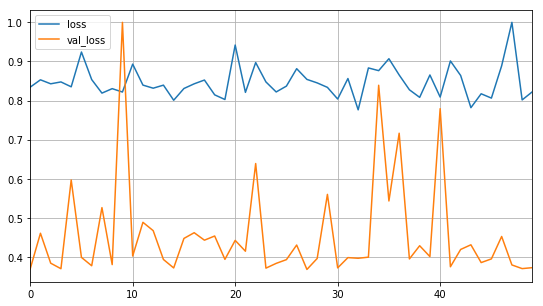

In [42]:
max_val = pd.DataFrame(history.history).max()
(pd.DataFrame(history.history)/max_val).plot(figsize=(9,5))
#plt.gca().set_ylim(0.99, 1)
plt.grid(True)
plt.show()

Como suele ser la norma, el algoritmo se desempena mejor sobre el conjunto de entrenamiento que sobre el conjunto de prueba.

Es importante estar atento porque una senal caracteristica de `overfitting` 
es cuando el desempeno continua mejorando sobre el conjunto de entrenamiento
pero se hace peor en el conjunto de prueba. Si esto ocurre hay que revisar.

## Apredizaje Supervisado
### Modelo Lineal - Clasificacion Binaria

Queremos predecir si un usuario de cierta pagina web comprara un producto usando como dato el tiempo que pasa en la pagina del producto. La etiqueta es binaria (compro: 1, no compro: 0).

In [43]:
df_buy = pd.read_csv('./datasets/user_visit_duration.csv')
df_buy.head()

Time (min)  Buy
0    2.000000    0
1    0.683333    0
2    3.216667    1
3    0.900000    0
4    1.533333    1

In [44]:
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
Time (min)    100 non-null float64
Buy           100 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


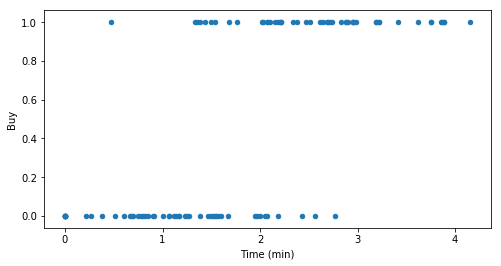

In [45]:
df_buy.plot(kind='scatter',x='Time (min)', y='Buy',
           figsize=(8,4))

Definimos las variables predictivas y el target

In [46]:
X = df_buy['Time (min)']
y = df_buy['Buy']

Probamos usar el mismo modelo (arquitectura) que usamos en el ejemplo anterior. Para ello reinicializamos los parametros.

In [47]:
resetWeights = [np.array([[1.]]), np.array([0.])]
model.set_weights(resetWeights)

In [48]:
model.get_weights()

[array([[1.]], dtype=float32), array([0.], dtype=float32)]

In [49]:
model.fit(X, y, epochs=200, verbose=0)

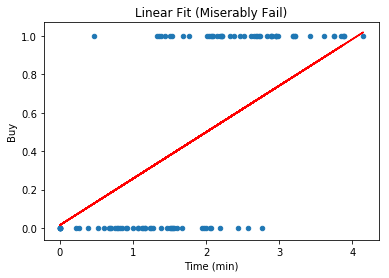

In [50]:
y_pred = model.predict(X)

df_buy.plot(kind='scatter', x='Time (min)', y='Buy',
           title='Linear Fit (Miserably Fail)')
plt.plot(X, y_pred, color='red')

Como puedes ver no tiene mucho sentido utilizar una línea recta para predecir un resultado que solo puede arrojar valores 0 o 1. Observando esto, la modificacion que tenemos que aplicar a nuestro modelo para que funcione es en realidad bastante sencilla.

### Regresion Logistisca

Abordaremos este problema con un metodo llamado Regresion Logistica. A pesar de que su nombre es "regresion", esta tecnica es realmente util para resolver problemas de clasificacion, es decir, problemas en los que el resultado es discreto.

La tecnica de regresion lineal que acabamos de aprender predice valores en el eje real para cada punto de datos de entrada. Es podemos modificar la forma de la hipotesis para poder predecir la probabilidad de un resultado para cada valor de la entrada. De esta forma nuestro modelo daría un valor entre 0 y 1. En ese punto podríamos utilizar p = 0.5 como criterio de division y asignar cada punto predicho con una probabilidad inferior a 0.5 a la clase 0, y cada punto predicho con una probabilidad superior a 0,5 a la clase 1.

En otras palabras, si modificamos la hipotesis de regresión para permitir una funcion no lineal entre el dominio de nuestros datos y el intervalo [0,1], podemos utilizar la misma maquinaria para resolver un problema de clasificacion.

Necesitamos una funcion no lineal que mapee todo el eje real en el intervalo [0,1]. Hay muchas funciones de este tipo. Una función simple, suave y que se comporta bien es la `sigmoide`.

Text(0.5, 1.0, 'Sigmoid')

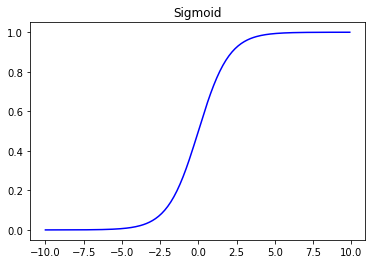

In [51]:
def sigmoid(z):
    return 1./(1. + np.exp(-z))

z = np.arange(-10, 10, 0.1)

plt.plot(z, sigmoid(z), color='blue')
plt.title('Sigmoid')

Usando la sigmoide podemos formular la hipotesis para el problema de clasificacion

$\mbox{Comprar} = \frac{1}{1+e^{-(tw+b})} = \hat{y}$

La sigmoide se utiliza generalmente para la capa de salida en las redes de clasificacion. No suele usarse entre capas internas porque hay otras funciones que se comportan mejor.

Text(0.5, 1.0, 'Changing b')

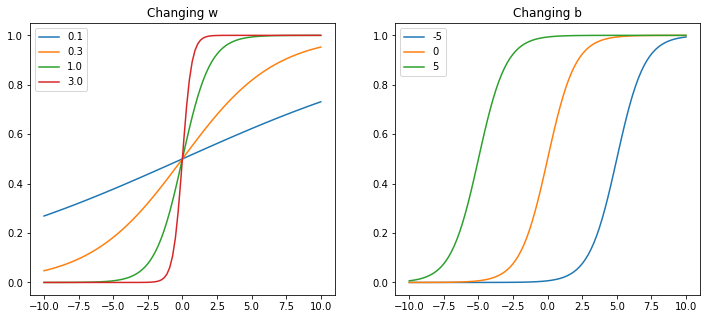

In [52]:
x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12,5))

plt.subplot(121)

ws = [.1, .3, 1., 3.]
for w in ws:
    plt.plot(x, sigmoid(line(x, w)))
    
plt.legend(ws)
plt.title('Changing w')

plt.subplot(122)

bs = [-5, 0, 5]
for b in bs:
    plt.plot(x, sigmoid(line(x, w=1, b=b)))
    
plt.legend(bs)
plt.title('Changing b')

### Funcion de Costo (loss)

Es necesario ajustar la definicion de la funcion de coste para que tenga sentido para un problema de clasificacion binaria. Hay varias opciones para ello, de forma similar al caso de la regresion, incluyendo `square loss`, `hinge loss` y `logistic loss`.

Los modelos de *Deep Learning* aprenden minimizando la funcion costo. Esto requiere que la funcion tenga un dicho minimo en primer lugar. En matematicas, esto quiere decir que la funcion de coste debe ser convexa y diferenciable.

Una de las funciones de costo mas usadas en *Deep Learning* es `cross entropy`. Esta se define como

$ C_i = -y_i \ln(\hat{y}_i) - (1 - y_i) \ln(1 - \hat{y}_i) $

Dado que $y$ unicamente puede ser 0 o 1, solo uno de los terminos aparece al evaluar.

Si $y_i = 0$

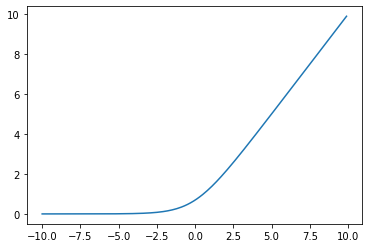

In [52]:
plt.plot(z, -np.log(1-sigmoid(z)));

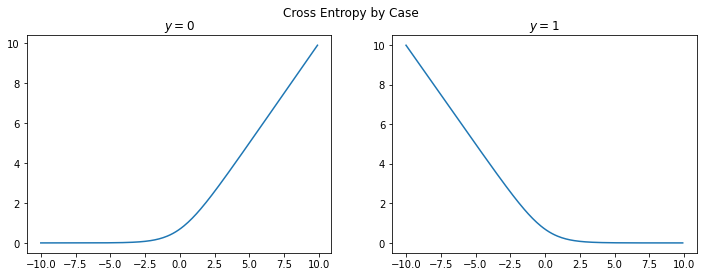

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

axs[0].plot(z, -np.log(1-sigmoid(z)))
axs[0].set_title('$y = 0$')
axs[1].plot(z, -np.log(sigmoid(z)))
axs[1].set_title('$y = 1$')

fig.suptitle('Cross Entropy by Case');

Una vez definida para un solo punto, el promedio de la funcion costo es

$ c = \displaystyle{\frac{1}{N} \sum_i c_i }$

Esta funcion puede generalizarse a problemas con multiples clases. Para ello puede usarse la funcion `softmax` como generalizacion de la `sigmoide` y como funcion costo `categorical cross entropy`.

A continuacion definimos nuestro modelo usando `Keras`.

In [53]:
logistic = Sequential()
logistic.add(Dense(1, input_dim=1))

In [54]:
from tensorflow.keras.layers import Activation

In [55]:
logistic.add(Activation('sigmoid'))

In [56]:
logistic.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


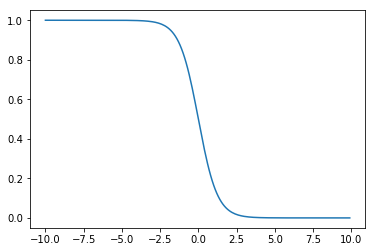

In [58]:
plt.plot(z, logistic.predict(z))

In [59]:
logistic.compile(optimizer=SGD(lr=.5),
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [60]:
logistic.fit(X, y, epochs=25)

Train on 100 samples
Epoch 1/25
100/100 [==============================] - 0s 680us/sample - loss: 1.5397 - accuracy: 0.4200
Epoch 2/25
100/100 [==============================] - 0s 70us/sample - loss: 0.6934 - accuracy: 0.5000
Epoch 3/25
100/100 [==============================] - 0s 50us/sample - loss: 0.6563 - accuracy: 0.5000
Epoch 4/25
100/100 [==============================] - 0s 80us/sample - loss: 0.6358 - accuracy: 0.5700
Epoch 5/25
100/100 [==============================] - 0s 40us/sample - loss: 0.5783 - accuracy: 0.6200
Epoch 6/25
100/100 [==============================] - 0s 70us/sample - loss: 0.5561 - accuracy: 0.7100
Epoch 7/25
100/100 [==============================] - 0s 60us/sample - loss: 0.5235 - accuracy: 0.7600
Epoch 8/25
100/100 [==============================] - 0s 120us/sample - loss: 0.5131 - accuracy: 0.8000
Epoch 9/25
100/100 [==============================] - 0s 90us/sample - loss: 0.4876 - accuracy: 0.7900
Epoch 10/25
100/100 [=============================

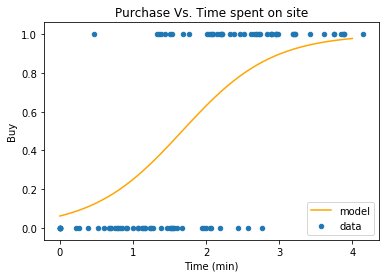

In [61]:
ax = df_buy.plot(kind='scatter', x='Time (min)', y='Buy',
                title='Purchase Vs. Time spent on site')

temp = np.linspace(0,4)
ax.plot(temp, logistic.predict(temp), color='orange')
plt.legend(['model', 'data'])

Notar que la regresion logistica produce una probabilidad

In [62]:
y_pred = logistic.predict(X)
y_pred[:5]

array([[0.6305923 ],
       [0.16639465],
       [0.92538834],
       [0.22127822],
       [0.44376284]], dtype=float32)

Si queremos una prediccion binaria, podemos imponer un umbral a los resultados

In [66]:
y_pred_bin = y_pred > .5
y_pred_bin[:5]

array([[ True],
       [False],
       [ True],
       [False],
       [False]])

Usando este arreglo podemos calcular el `accuracy` del modelo. Recordamos que `accuracy` es 

$$\mbox{Acc} = \dfrac{TP + TN}{\mbox{All}}$$

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
acc = accuracy_score(y, y_pred_bin)
print('Accuracy Score: {:.3f}'.format(acc))

Accuracy Score: 0.840


A continuacion realizamos el proceso de validacion.

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [154]:
X_test[1:4].values[0]

1.35

In [101]:
params = logistic.get_weights()
params

[array([[2.1871839]], dtype=float32), array([-3.800356], dtype=float32)]

In [102]:
params = [np.zeros(w.shape) for w in params]
params

[array([[0.]]), array([0.])]

In [103]:
logistic.set_weights(params)

In [104]:
acc = accuracy_score(y, logistic.predict(X) > .5)
print('Accuracy Score: {:.3f}'.format(acc))

Accuracy Score: 0.500


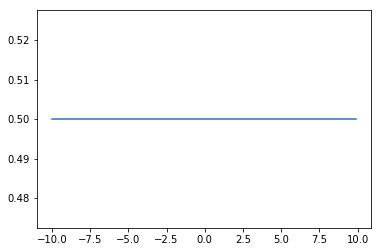

In [105]:
plt.plot(z, logistic.predict(z));

In [106]:
history = logistic.fit(X_train, y_train, epochs=25, verbose=0, validation_data=(X_test, y_test))

In [107]:
y_train_pred_class = logistic.predict(X_train) > .5
acc = accuracy_score(y_train, y_train_pred_class)
print('Train Accuracy Score: {:0.3f}'.format(acc))

Train Accuracy Score: 0.825


In [108]:
y_test_pred_class = logistic.predict(X_test) > .5
acc = accuracy_score(y_test, y_test_pred_class)
print('Test Accuracy Score: {:0.3f}'.format(acc))

Test Accuracy Score: 0.850


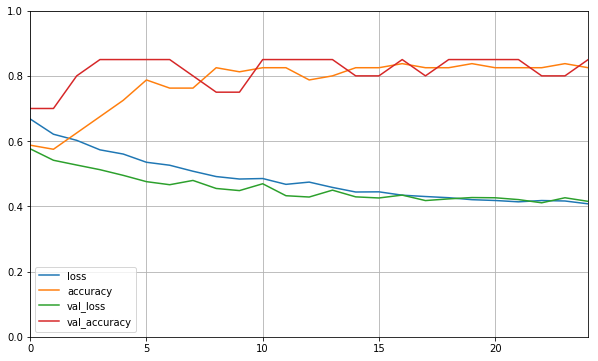

In [109]:
pd.DataFrame(history.history).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Podemos ver algunas predicciones en terminos de probabilidades evaluando el modelo

In [170]:
X_new = X_test[:5]
y_prob = logistic.predict(X_new)

for n in range(X_new.size): 
    print('Para un tiempo de {:.3f} la probabilidad de comprar es {:.2f}.'.format(X_new.values[n], y_prob[n,0]))

Para un tiempo de 3.750 la probabilidad de comprar es 0.95.
Para un tiempo de 1.350 la probabilidad de comprar es 0.37.
Para un tiempo de 1.767 la probabilidad de comprar es 0.51.
Para un tiempo de 3.217 la probabilidad de comprar es 0.90.
Para un tiempo de 0.000 la probabilidad de comprar es 0.08.


### Cross-Validation

Aunque tuviéramos mucho cuidado al dividir nuestros datos de forma aleatoria, esa es sólo una de las muchas formas posibles de realizar una división. ¿Qué pasaría si realizáramos varias divisiones diferentes de entrenamiento/prueba, comprobáramos la puntuación de la prueba en cada una de ellas y, finalmente, promediáramos las puntuaciones? No sólo tendríamos una estimación más precisa del `accuracy` real, sino que también podríamos calcular la desviación estándar de las puntuaciones y, por lo tanto, conocer el error en el `accuracy`. Este proceso se conoce como `cross-validation` y la forma usual de implementarlo es a traves de `K-fold cross-validation`.

En `K-fold cross-validation`, el conjunto de datos se divide en `K` subconjuntos aleatorios de igual tamaño. Entonces, cada uno de los `K` subconjuntos desempeña el papel de conjunto de prueba, mientras que los demás se agregan para formar un conjunto de entrenamiento. De este modo, obtenemos `K` estimaciones de la puntuación del modelo, cada una calculada a partir de un conjunto de pruebas que no se solapa con ninguno de los otros conjuntos de pruebas.

`Scikit-Learn` ofrece `cross-validation` de forma inmediata, pero tendremos que usar un `wrapper` para nuestro modelo y que de esta manera pueda ser entendida por `Scikit-Learn`.

In [171]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [172]:
def build_logistic():
    logistic = Sequential()
    logistic.add(Dense(1, input_dim=1,
                      activation='sigmoid'))
    logistic.compile(optimizer=SGD(lr=.5),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
    return logistic

In [173]:
logistic = KerasClassifier(build_fn=build_logistic,
                          epochs=25, verbose=0)

In [174]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [175]:
cv = KFold(3, shuffle=True)
scores = cross_val_score(logistic, X, y, cv=cv)
scores

array([0.7352941 , 0.78787881, 0.90909094])

In [176]:
m = scores.mean()
s = scores.std(ddof=1)

print('Cross Validation Accuracy:',
     '{:.4f} ± {:.4f}'.format(m, s))

Cross Validation Accuracy: 0.8108 ± 0.0891


### Confusion Matrix

¿Es `accuracy` la mejor manera de comprobar el rendimiento de nuestro modelo? Nos dice lo bien que lo estamos haciendo en general, pero no nos da ninguna idea del tipo de errores que está cometiendo el modelo. Veamos como podemos hacerlo mejor.
En el problema que acabamos de introducir, estamos estimando la probabilidad de compra a partir del tiempo de permanencia en una pagina. Se trata de una clasificacion binaria, y podemos acertar o equivocarnos en las cuatro formas representadas aqui:

<div>
    <img src="./img/con_mat.png" width="500"/>
</div>

Esta tabla se llama matriz de confusion y da una mejor vision de las predicciones correctas e incorrectas.

In [177]:
from sklearn.metrics import confusion_matrix

In [178]:
confusion_matrix(y, y_pred_bin)

array([[41,  9],
       [ 7, 43]], dtype=int64)

Hacemos un poquito de *make-up* para presentarla mejor

In [179]:
def nice_cm(y_true, y_pred, labels=['False', 'True']):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted ' + l for l in labels]
    
    df = pd.DataFrame(cm, index=labels,
                     columns=pred_labels)
    return df

In [180]:
nice_cm(y, y_pred_bin, ['Not Buy', 'Buy'])

Predicted Not Buy  Predicted Buy
Not Buy                 41              9
Buy                      7             43

Otras metricas para medir el performance son

- `Precision`
- `Recall`
- `F1`

Sus definiciones son: 
$$\mbox{P} = \dfrac{T\!P}{T\!P+F\!P}$$

$$\mbox{R} = \dfrac{T\!P}{T\!P+F\!N}$$

$$\mbox{F1} = \dfrac{2}{\frac{1}{\mbox{P}} + \frac{1}{\mbox{R}}} = 2\dfrac{\mbox{P R}}{\mbox{P + R}}$$

In [183]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [184]:
precision = precision_score(y, y_pred_bin)
print('Precision:\t{:.3f}'.format(precision))

recall = recall_score(y, y_pred_bin)
print('Recall: \t{:.3f}'.format(recall))

f1 = f1_score(y, y_pred_bin)
print('F1 Score: \t{:.3f}'.format(f1))

Precision:	0.827
Recall: 	0.860
F1 Score: 	0.843


In [86]:
df.head()

Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801

In [87]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

Gender_Female  Gender_Male
0              0            1
1              0            1
2              0            1
3              0            1
4              0            1

In [88]:
df['Height (feet)'] = df['Height']/12.
df['Weight (100 lbs)'] = df['Weight']/100.

df.describe().round(2)

Height    Weight  Height (feet)  Weight (100 lbs)
count  10000.00  10000.00       10000.00          10000.00
mean      66.37    161.44           5.53              1.61
std        3.85     32.11           0.32              0.32
min       54.26     64.70           4.52              0.65
25%       63.51    135.82           5.29              1.36
50%       66.32    161.21           5.53              1.61
75%       69.17    187.17           5.76              1.87
max       79.00    269.99           6.58              2.70

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])

df.describe().round(2)

Height    Weight  Height (feet)  Weight (100 lbs)  Weight_mms  \
count  10000.00  10000.00       10000.00          10000.00    10000.00   
mean      66.37    161.44           5.53              1.61        0.47   
std        3.85     32.11           0.32              0.32        0.16   
min       54.26     64.70           4.52              0.65        0.00   
25%       63.51    135.82           5.29              1.36        0.35   
50%       66.32    161.21           5.53              1.61        0.47   
75%       69.17    187.17           5.76              1.87        0.60   
max       79.00    269.99           6.58              2.70        1.00   

       Height_mms  
count    10000.00  
mean         0.49  
std          0.16  
min          0.00  
25%          0.37  
50%          0.49  
75%          0.60  
max          1.00

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])

df.describe().round(2)

Height    Weight  Height (feet)  Weight (100 lbs)  Weight_mms  \
count  10000.00  10000.00       10000.00          10000.00    10000.00   
mean      66.37    161.44           5.53              1.61        0.47   
std        3.85     32.11           0.32              0.32        0.16   
min       54.26     64.70           4.52              0.65        0.00   
25%       63.51    135.82           5.29              1.36        0.35   
50%       66.32    161.21           5.53              1.61        0.47   
75%       69.17    187.17           5.76              1.87        0.60   
max       79.00    269.99           6.58              2.70        1.00   

       Height_mms  Weight_ss  Height_ss  
count    10000.00   10000.00   10000.00  
mean         0.49       0.00       0.00  
std          0.16       1.00       1.00  
min          0.00      -3.01      -3.15  
25%          0.37      -0.80      -0.74  
50%          0.49      -0.01      -0.01  
75%          0.60       0.80       0.73  
max          1.00       3.38       3.28

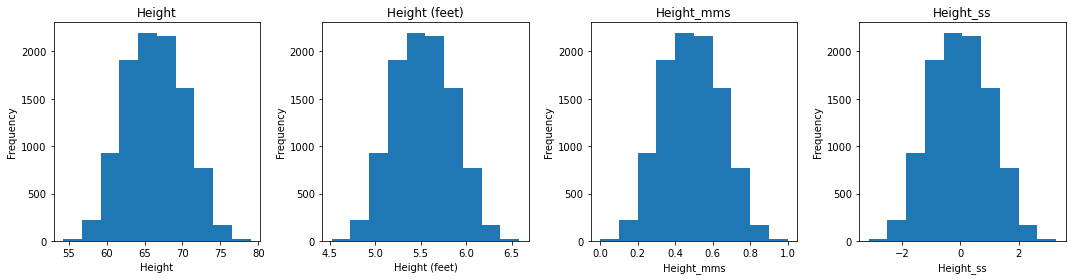

In [93]:
plt.figure(figsize=(15,4))

for (i, feature) in enumerate(['Height', 
                               'Height (feet)', 
                               'Height_mms', 
                               'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)
    
plt.tight_layout()

### Ejercicio 1:

- cargar la data `housing-data.csv`
- graficar los histogramas para cada feature
- crear dos variables `X`, `y`: `X` debe ser una matriz con tres columnas (sqft, bdrms, age); `y` debe ser un vector con una columna (price)
- configurar un modelo en Keras para hacer un ajuste lineal (tener cuidado del numero apropiado de inputs y outputs)
- dividir la data en `train` y `test`
- entrenar el modelo usando el conjunto `train` y contrastar el desempeno obtenido tanto con `train` como con `test`
- ¿como se comporta el modelo?
- trata de mejorar el modelo realizando alguna de las siguientes acciones:
    - normalizar los inputs con algunas de los metodos mencionados
    - usa un valor de `learning rate` diferente
    - usar un `optimizer` distinto
- cuando estes satisfecho con el resultado, calcula el valor $R^2$ sobre el `test`

**Opcional 1**

Una vez que has encontrado un modelo con el cual estas satisfecho, es posible hacer un test simple y convincente para determinar cuan bueno es el performance del modelo. La idea es la siguiente:
- Tomar el vector `y_train` y realizar una permutacion.
- Entrenar el modelo usando este `y_train` permutado.
- Calcular el `mean_squared_error` (o $R^2$ para efectos del ejercicio es indiferente) y guardarlo en una lista.
- Iterar sobre los tres pasos anteriores (100, 1000 veces? Lo que te permita la maquina en un tiempo razonable; razonable quiere decir unos pocos minutos).
- Con la lista creada haz un histograma.
- Determina la probabilidad de obtener el desempeno original en terminos de esta distribucion.

Lo que hacemos aca es un test de hipotesis y lo que estamos respondiendo es cual es la probabilidad de que el desempeno obtenido inicialmente sea producto del azar.

**Opcional 2**

Transformar el problema de regresion a un problema de clasificacion. La idea es:
- Dividir los valores en `y` (price) en categorias. Para ello hay que realizar cortes y asignarles una etiqueta.
- Replantear el problema para atacarlo como un problema de clasificacion: decidir la funcion costo, decidir la metrica, etc.

### Ejercicio 2

El objetivo es predecir la variable `left` usando el resto de la data. Como el target es binario, este es un problema de clasificacion.

- cargar la data `HR_comma_sep.csv`. Inspeccionar.
- verificar si algun feature necesita reescalamiento.
- transformar las variables categoricas usando dummies.
- split la data.
- jugar con los ajustes del learning rate y el optimizer.
- verificar la matriz de confusion, precision y recall.
- verificar los resultados usando 5-Fold cross-validation.
- ¿es bueno este modelo?

***Opcional 1***

Para tratar de refinar el modelo podemos tratar de explorar las variables que funcionan mejor como predictores. Podemos usar dos tecnicas simples tratando de determinar el grado de correlacion.
1. Si la correlacion es categorica-continua hacemos un modelo logistico exploratorio para el `target` y cada variable numerica que queremos explorar. Si hay correlacion, lograremos producir un buen modelo predictivo con ese par.
2. Si la correlacion es categorica-categorica lo mas simple es construir una tabla de contingencia (`cross tabulation`) y detectar de alli si hay alguna correlacion.

La idea final es quedarse con las variables que produzcan los mejores resultados.
- Una vez que hayas reducido el espacio de variables predictivas, contruye un nuevo modelos y compara el performance con el obtenido usando todas las variables.
- Que puedes concluir?

***Opcional 2***

Otra forma de refinar el modelo es introducir una capa oculta al modelo de clasificacion.

- Modifica el modelo original (o el de la ***opcion 1***) y agrega una capa (oculta) entre la entrada y la salida. Esta capa sera de la clase `Dense` al igual que las otras que hemos trabajado.
- Experimenta con el numero de neuronas de la capa oculta. Investiga sobre las funciones de activacion.
- Entrena el modelo y compara con los resultados obtenidos en el modelo original.
- Que puedes concluir?